#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 4
### Due: Monday, Feb 21th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 21th.

---

## Problem 1

Let $\mu$ be a real number. Let $\sigma$ be a strictly positive real number.

Show that for a Gaussian distribution $\mathscr{N}(\mu,\sigma)$, the mode is its mean $\mu$.

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

### Solution

To find the mode of a distribution, the mode will represent the distribution's maximum. This can be achieved by maximizing the function [-(x-mu)^2]/[2*sigma^2] at x
This is the same as saying if we are trying to minimize [(x-mu)^2]/[2*sigma^2]
Due to the nature of squares, the smallest value this expression can take is at 0.
[(x-mu)^2]/[2*sigma^2] = 0
Simplyfying, with sigma and mu being arbitrary values, (x-mu)^2 = 0 or x = mu.
Thus the mode of a gaussian distribution is its mean.

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with the given $\mu$ and $\sigma$. a) Plot the distribution, b) give 10 random draws, along with the pdf at each of the draws. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 130? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?



### Solution



In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

mu = 100
sigma = 15

In [5]:
distG = scipy.stats.norm(mu,sigma) # Normal distribution with mean = 100, stdev = 15
draws = np.random.normal(mu,sigma,10) # 10 random draws
p = norm.pdf(0,mu,sigma) # pdf evaluated at x=0

#10 random draws with the pdf of the each draw

print(draws)
print(p)

[105.03646073  91.08629102  87.35265262 112.86617585 102.50355273
 123.89340621 113.40545865 105.80079721 101.08843866  81.28268363]
5.940600124901435e-12


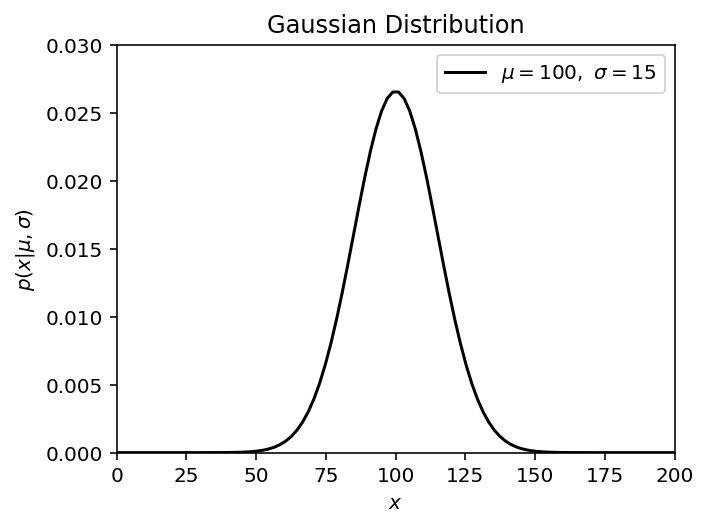

In [6]:
## Plot a Gaussian Distribution

xgrid = np.linspace(0,200,100)
gaussPDF = distG.pdf(xgrid)  # this is a function of xgrid

# actual plotting
fig, ax = plt.subplots(figsize=(5, 3.75))

# Python3 f strings are awesome!
plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()

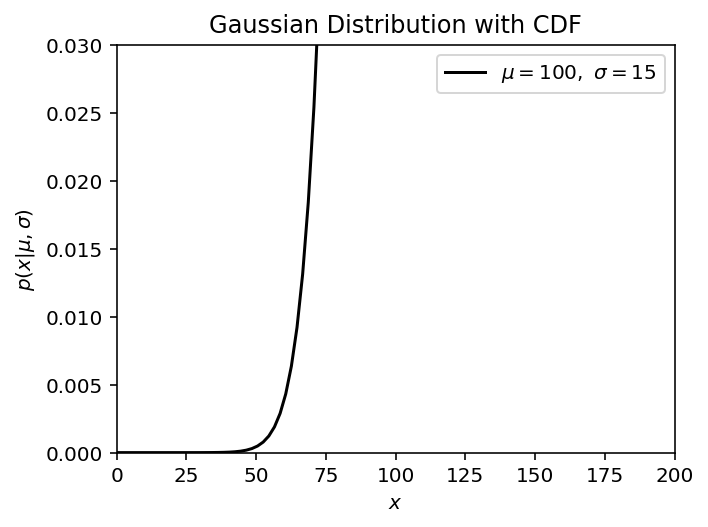

In [8]:
#CDF property of Gaussian
xgrid = np.linspace(0,200,100)
gaussCDF = distG.cdf(xgrid)  # this is a function of xgrid

# actual plotting
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(xgrid, gaussCDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution with CDF')
plt.legend()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([124.1728044, 124.2728044, 124.3728044, 124.4728044, 124.5728044,
        124.6728044, 124.7728044, 124.8728044, 124.9728044, 125.0728044,
        125.1728044]),
 <BarContainer object of 10 artists>)

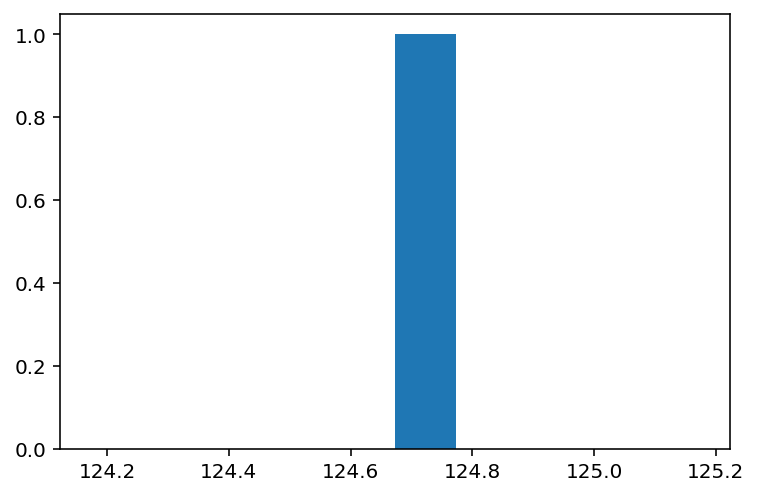

In [15]:
#PPF of Gaussian

plt.hist(norm.ppf(q=0.95, loc=100, scale=15))

In [19]:
#Fraction of people with IQ > 130

1-norm.cdf(130, 100, 15)

0.02275013194817921

In [20]:
#IQ that corresponds to 1 in a million

norm.ppf(q=0.000001, loc=100, scale=15)

28.69863536765652